# Reverse-Time Diffusion Equation (RTDE)
> For the Fall 2024 course: *Machine Learning in Physics*<br>
> Created: Aug. 14, 2024 Harrison B. Prosper<br>
> Updated: Nov. 06, 2025 Harrison B. Prosper, update using GSoC improvements (Sijil Jose)<br>

## Introduction
Let $x_t \equiv x(t) \in \mathbb{R}^d$ be a $d$-dimensional vector defined on the domain $t \in [0, 1]$. Let $x_0 \sim p(x)$ be the **initial state** sampled from the probability density $p(x)$ and $x_1$ be the **terminal state**, that is, the state at the end of the trajectory that begins with $x_0$. Following the notation of [1], the path from $x_0$ to $x_1$ is the solution of the **forward stochastic differential equation** (SDE)
\begin{align}
    dx_t = {\color{blue}f(t) x_t dt} + {\color{darkred}g(t) dW_t},
\end{align}
where ${\color{blue}f(t) x_t dt}$, the **drift term**, is deteministic and ${\color{darkred}g(t) dW_t} = g(t) z \sqrt{dt}$ is a **stochastic term** with $z \sim {\cal N}(0, \mathbf{I}_d)$ a $d$-dimensional random variable from a diagonal $d$-dimensional standard normal.  Because of the stochastic term $x_t$ is also a random variable. One might be tempted to write the above equation in terms of $dx_t / dt$,  however, the path from $x_0$ to $x_t$ is infinitely corrugated and, consequently, is nowhere differentiable!  

In [1, 2] it is shown that if one chooses
\begin{align}
    f(t) & = \frac{d\log\alpha_t}{dt}, &\quad \alpha_t \equiv \alpha(t),\\
    g^2(t) & = \frac{d\sigma_t^2}{dt} - 2 f(t) \sigma_t^2, &\quad \sigma_t \equiv \sigma(t), 
 \end{align}
then the conditional probability density of $x_t$ is given by 
\begin{align}
p(x_t | x_0) & = {\cal N}(x_t; \alpha_t x_0, \, \sigma^2_t \mathbf{I}), \\
 & = \prod_{i=1}^d {\cal N}(x_{t, i}; \alpha_t x_{0,i}, \sigma_t^2),\\
 & = \frac{1}{(\sigma \sqrt{2\pi})^d} \exp\left[ -\frac{1}{2}\sum_{i=1}^d \left( \frac{x_{t, i} - \alpha(t) \, x_{0, i}}{\sigma(t)} \right)^2 \right],
\end{align}
where $x_{t, i} \equiv x_i(t)$ is the $i^\text{th}$ component of the $d$-dimensional vector $x(t)$. Defining the $d$-dimensional vector
\begin{align}
    z(t) & = \frac{x(t) - \alpha(t) \, x(0)}{\sigma(t)} ,
\end{align}
we can write
\begin{align}
p(x_t | x_0) & \equiv p(x(t) | x(0)), \\
 & \propto \exp \left(-\frac{1}{2}  z^2 \right). 
\end{align}

If $\alpha_t$ is chosen so that it goes to zero as $t \rightarrow 1$ and $\sigma_t$ remains finite in that limit then the terminal state $x_1$ will be distributed according to a zero mean diagonal $d$-dimensional normal with variance $\sigma_1^2$ irrespective of the initial state $x_0$. The $d$-dimensional Gaussian is a **fixed point** of the SDE. 

## Reverse-Time Ordinary Differential Equation (ODE)
Even more remarkable than the above is the existence of a mechanism to go from $x_1$ to $x_0$.
In [3] Feng Bao *et al.* note the striking mathematical fact that the reverse-time ODE
\begin{align}
    dx_t & = \left[f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t)\right] dt, \quad S(t, x_t) \equiv \nabla_{x_t} \log p(x_t),
\end{align}
where $p(x_t)$ is the probability density of $x_t$ and $S(x_t, t)$ is the **score funtion** associated with $p(x_t)$ can be used 
to map $x_t$ back to $x_0$ *deterministically*.  This is remarkable! Moreover, because these $d$ equations are ordinary differential equations we can rewrite the above as
\begin{align}
    \frac{d x_t}{dt} &= G(t, x_t), \, \, \text{ where} \\
    G(t, x_t) & = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t) .
\end{align}
The key technical task in using this equation is computing the score function, 
\begin{align}
    S(t, x_t)
                & = \frac{1}{p(x_t)}\nabla_{x_t} p(x_t), \quad p(x_t) = \int_{\mathbb{R}^d}   p(x_t | x_0) \, p(x_0) \, dx_0, \nonumber\\
        & = -\frac{1}{p(x_t)}\int_{\mathbb{R}^d} \left(\frac{x_t - \alpha_t x_0}{\sigma_t^2} \right) p(x_t | x_0) \, p(x_0) \, dx_0,\nonumber\\
        & = - \frac{1}{\sigma_t^2} \left(x_t - \alpha_t \int_{\mathbb{R}^d}  x_0 \, \frac{p(x_t | x_0) \, p(x_0)}{p(x_t)} \, dx_0 \right),\\
\rightarrow \, -\sigma_t^2 \,     S(t, x_t)        & = x_t - \alpha_t \, q(t, x_t),
\end{align}
where the vector
\begin{align}
 q(t, x_t) = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0,  
\end{align}
is the conditional expectation of the state $x_0$ at $t = 0$ given the state $x_t$ at time $t$. Following [1], $g^2(t)$ can be re-expressed as follows,
\begin{align}
    g^2(t) & = \frac{d\sigma_t^2}{dt} - 2 f(t) \sigma_t^2,\nonumber\\
    & = 2 \sigma_t \frac{d\sigma_t}{dt} - 2 \frac{d\log\alpha_t}{dt} \sigma_t^2,\nonumber\\
    & = 2 \sigma_t^2 \frac{d\log\sigma_t}{dt} - 2 \frac{d\log\alpha_t}{dt} \sigma_t^2,\nonumber\\
\rightarrow \quad    -\frac{1}{2} g^2(t) & = \sigma_t^2 \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}
Then we can rewrite $G(t, x_t)  = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t)$ as follows
\begin{align}
 G(t, x_t) & = f(t) x_t - \frac{1}{2} g^2(t) S(t, x_t),\nonumber\\
     & = \frac{d\log\alpha_t}{dt} \, x_t +  \frac{d\log\alpha_t/\sigma_t}{dt} 
     \sigma_t^2 S(t, x_t),
     \nonumber\\
     & = \frac{d\log\alpha_t}{dt} \, x_t + \frac{d\log\alpha_t/\sigma_t}{dt} 
     (\alpha_t \, q(t, x_t) - x_t), 
     \nonumber\\
     & = \frac{d\log\sigma_t}{dt} \, x_t  + \alpha_t \, \frac{d\log\alpha_t/\sigma_t}{dt} 
     \, q(t, x_t), 
     \nonumber\\
     & = \lambda(t) \, x_t + \mu(t)
     \, q(t, x_t), \text{ where}
     \\ \nonumber\\
   \lambda(t) = \lambda_t  & \equiv \frac{d\log\sigma_t}{dt} \text{ and }\\
   \mu(t) = \mu_t & \equiv \alpha_t \frac{d\log\alpha_t/\sigma_t}{dt}.
\end{align}

In summary, our task is to solve the integro-differential equation on the domain $t \in [1, 0]$,
\begin{align}
    \frac{dx}{dt} &= \lambda_t \, x + \mu_t \, q(t, x) ,
\end{align}
where we've dropped the subscript $t$ on $x$ without risk of confusion because, necessarily, the vector $x$ is a  function of $t$.

## Approximating $q(t, x)$
Bao *et al.* [2] propose to approximate the integrals over $\mathbb{R}^d$ using Monte Carlo integration. Writing 
$q(t, x)$ as
\begin{align}
q(t, x) & = \int_{\mathbb{R}^d}  x_0 \, p(x_0 \mid x) \, dx_0 , \\
& =  \int_{\mathbb{R}^d}  x_0 \, \frac{p(x \mid x_0) \, p(x_0)}{p(x)} \, dx_0,\\
                    & = \int_{\mathbb{R}^d}  x_0 \, \lambda(x, x_0) \, p(x_0) \, dx_0 ,  \quad\text{where the ratio } \lambda(x, x_0) = \frac{p(x \mid x_0)}{p(x)},
\end{align}
we can approximate the integral as follows, 
\begin{align}
        q(t, x)  & \approx \frac{1}{N} \sum_{n=1}^N x_0^{(n)} \, \lambda(x, x_0^{(n)}), \quad \lambda(x, x_{0,n}) \approx \frac{p(x \mid x_0^{(n)})}{\frac{1}{N}\sum_{m=1}^N p(x \mid x_0^{(m)})},\\
        & =  \sum_{n=1}^N x_0^{(n)} \, w(x, x_0^{(n)}), 
        \quad\text{where } \\
w(x, x_0^{(n)}) & = \frac{p(x | x_0^{(n)})}{\sum_{m=1}^N p(x | x_0^{(m)})},                
\end{align}
and $\{ x_0^{(n)} \}, n = 1,\cdots, N$ is a sample drawn from $p(x_0)$, which in practice, is approximated using a **simulator**. 

The function $\lambda(x, x_0)$ has an interesting interpretation as can be seen by writing it as follows,
\begin{align}
    \lambda(x, x_0) & = \frac{p(x \mid x_0)}{p(x)}, \nonumber\\
    & = \frac{p(x \mid x_0) \, p(x_0)}{p(x) \, p(x_0)}, \nonumber\\
    & = \frac{p(x, x_0)}{p(x) \, p(x_0)}.
\end{align}
The function $\lambda(x, x_0)$ measures the degree to which the variables $x$ and $x_0$ are statistically independent.

### Final form of $q(t, x)$

The vector field, which we refer to as the $q$-function, is given by
\begin{align}
        q(t, x)  & =  \int_{x_0 \in \mathbb{R}^d}  x_0 \, \frac{p(x | x_0)}{p(x)} \, p(x_0) , 
\end{align}
where $x_0$ is the *desired* value of $x(t)$ at $t = 0$, given the value $x(t) = z$ at $t = 1$.

The $q$-function can be approximated using 
\begin{align}
 q(t, x) & \approx 
       \sum_{n=1}^N x_0^{(n)} \, w(x, x_0^{(n)}), 
\end{align}
where $\{ x_0^{(n)} \}_{n=1}^N$ is sampled from the density $p(x_0)$, the weights $w(x, x_0^{(n)})$ are given by
\begin{align}
w(x, x_0^{(n)}) & = \frac{p(x | x_0^{(n)})}{\sum_{m=1}^N p(x | x_0^{(m)})},
\end{align}
and
\begin{align}
p(x | x_0) 
 & = (\sigma \sqrt{2\pi})^{-d} \exp \left(-u_t \right), \text{ with } u_t = \frac{1}{2}\sum_{i=1}^d \left( \frac{x_{i} - \alpha_t \, x_{0, i}}{\sigma_t} \right)^2, 
\end{align}
where $x_{i}$ and $x_{0, i}$ are the $i^\text{th}$ components of the $d$-dimensional vectors $x(t)$ and  $x(0) = x_0$, respectively. 
Therefore, 
we can write $q(t, x)$ in the elegant form
\begin{align}
        q(t, x)  
        & \approx 
       \sum_{n=1}^N x_0^{(n)} \, \texttt{softmax}(-u_n + u_\text{min}) ,
\end{align}
where 
$u_\text{min} = \min(u_1, \cdots, u_N)$.
Adding $u_\text{min}$ to $-u_n$ ensures that each term in the denominator of the $\texttt{softmax}$ function is $\leq 1$.
The $d$-dimensional vectors $z \equiv x(t=1)$ are sampled from a diagonal $d$-dimensional standard normal. 
If we set $\alpha_t = 1 - t$ and 
$\sigma_t = \sigma_0 + (1-\sigma_0) \, t$
this yields,
\begin{align}
    \lambda_t & = \frac{1 - \sigma_0}{\sigma_t} \text{ and }
    \mu_t  = -\frac{1}{\sigma_t} .
\end{align}


### References
  1. Yang Song, Jascha Narain Sohl-Dickstein, Ben Poole, *Score-Based Generative Modeling through Stochastic Differential Equation*, International Conference on Learning Representations, 26 November 2020; https://arxiv.org/abs/2011.13456
  2. Cheng Lu†, Yuhao Zhou†, Fan Bao†, Jianfei Chen†, Chongxuan Li‡, Jun Zhu, *DPM-Solver: A Fast ODE Solver for Diffusion Probabilistic Model Sampling in Around 10 Steps*, arXiv:2206.00927v3, 13 Oct 2022.
  1. Yanfang Lui, Minglei Yang, Zezhong Zhang, Feng Bao, Yanzhao Cao, and Guannan Zhang, *Diffusion-Model-Assisted Supervised Learning of Generative Models for Density Estimation*, arXiv:2310.14458v1, 22 Oct 2023

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# to plot pixelized images
import imageio.v3 as im

# module to access data in Hierarchical Data Format (HDF or H5 format)
import h5py

import shutil
import importlib

import flowde.solver as fs
import flowde.anim as fa

# update fonts
plt.rcParams.update({
  "text.usetex": shutil.which('latex') is not None,
  "font.family": "sans-serif",
  "font.sans-serif": "Helvetica",
  "font.size": 14
  })

## Computational Device

In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'\n\tComputational device: {str(DEVICE):4s}\n')


	Computational device: cpu 



## Load Data

In [3]:
filename = 'spiral.h5'

f = h5py.File(filename, "r")

X0 = np.array(f['X0']).astype(np.float32)

X0.shape

(100000, 2)

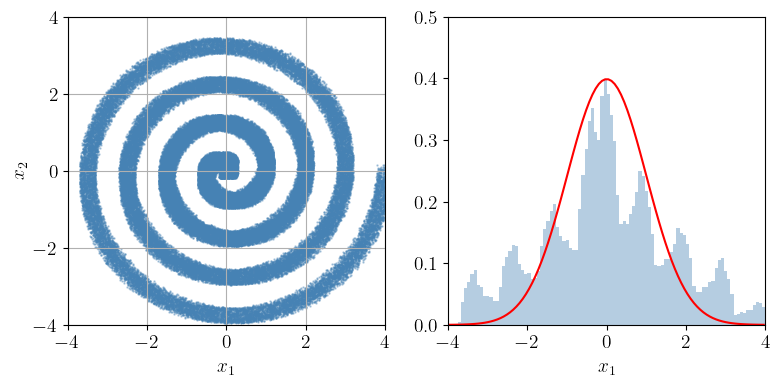

In [4]:
def plot_data(d, 
              xmin=-4, xmax=4, 
              ymin=-4, ymax=4, 
              filename='fig_spiral.png'):

    x1, x2 = d[:, 0], d[:, 1]
    
    fig = plt.figure(figsize=(9, 4))
    fig.tight_layout()
    
    ax  = fig.add_subplot(1, 2, 1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$x_1$')
    
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$x_2$')
    
    ax.scatter(x1, x2, s=0.5, color='steelblue', alpha=0.4)

    ax.grid('both')

    ax2  = fig.add_subplot(1, 2, 2)
    ax2.set_xlim(xmin, xmax)
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylim(0, 0.5)
    
    c, x, _ = ax2.hist(x1, range=(xmin, xmax), bins=100, density=True, 
                       color='steelblue', alpha=0.4)
    x = (x[1:]+x[:-1])/2
    h = x[1]-x[0]
    y = st.norm.pdf(x)
    ax2.plot(x, y, color='red')
    
    if filename:
        plt.savefig(filename)
        
    #plt.show()

plot_data(X0)

100%|█████████████████████████████████████| 249/249 [01:00<00:00,  4.09it/s]

torch.Size([50]) torch.Size([50, 3000, 2])


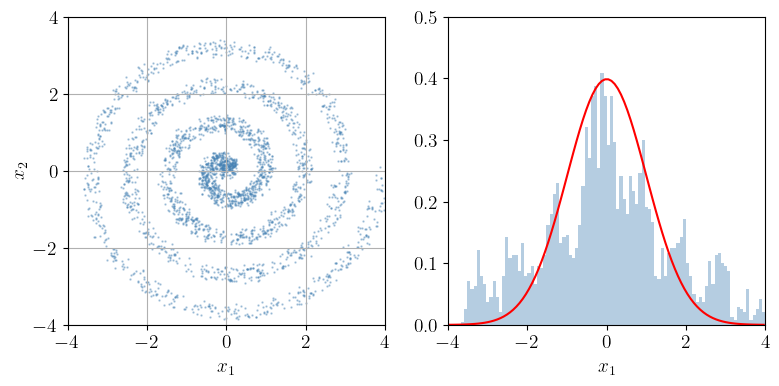

In [5]:
B  = 10000 # sample size for Monte Carlo approximation of integrals
x0 = fs.get_target_sample(X0, B)
ode= fs.FlowDE(x0, T=250, step=5, savepath=True)

N  =  3000 # number of flows (solutions)
z  = fs.get_normal_sample(X0[:N])
t, y = ode(z)
print(t.shape, y.shape)

plot_data(y[-1])

## Animate flows

In [8]:
anim = fa.Flow2DAnimation(y, mcolor='steelblue')
anim.show();

In [9]:
anim.save('flow.gif')

# need ffmpeg:
# conda install ffmpeg 
anim.save('flow.mp4')

frame: 49